# India Car Sales data 2024.

# About Dataset
This dataset provides detailed information about car sales in India for the year 2024. It includes monthly sales figures for various car makes and models, along with additional metrics and attributes that help analyze market trends and performance. The dataset is ideal for data analysis, visualization, and understanding the automobile market dynamics in India.

# Features:

Make: The manufacturer of the car

Model: The specific car model

January Sales to December Sales: Monthly sales data for each car model in 2024.

Total Sales: The cumulative sales for the entire year.

Segment: The market segment the car belongs to

Body Type: The type of car body

Month-on-Month Percentage (MoM %): Percentage change in sales compared to the previous month.

Year-on-Year Percentage (YoY %): Percentage change in sales compared to the same month in 2023.


# Potential Use Cases:

1.Analyzing car sales trends over 2024.

2.Comparing performance of car models and manufacturers.

3.Studying market preferences for segments and body types.

4.Identifying seasonal trends in car sales.

5.Developing sales forecasts or business strategies for the automobile industry.

This dataset was sourced from Auto Punditz (https://www.autopunditz.com/). The website allows sharing the data but does not specify whether modifications are permitted. As a precaution, this dataset is shared under the CC BY-ND 4.0 license, which prohibits modification. Please refer to the original website's terms of use for more information.

The dataset has three excel sheets
1. Car Sales in India- 2024
2. car Sales in India 2024
3. Car sales in India - 2024 (unpivoted version)

In [17]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:

pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 23.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.9/41.0 MB 15.0 MB/s eta 0:00:03
   ------ --------------------------------- 6.8/41.0 MB 16.6 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/41.0 MB 18.7 MB/s eta 0:00:02
   -------------- ------------------------- 15.2/41.0 MB 18.4 MB/s eta 0:00:02
   ------------------ --------------------- 18.6/41.0 MB 18.0 MB/s eta 0:00:02
   --------------------- ------------------ 22.0/41.0 MB 17.5 MB/s eta 0:00:02
   ------------------------- -------------- 26.2/41.0 MB 18.0 MB/s eta 0:00


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # vis data
%matplotlib inline
import seaborn as sns

In [20]:
import os

In [21]:
os.listdir()

['.ipynb_checkpoints',
 'Car Sales in India - 2024 (Unpivot Version).xlsx',
 'Car Sales in India - 2024.xlsx',
 'Car Sales India 2024.xlsx',
 'Carsales.ipynb',
 '~$Car Sales India 2024.xlsx']

In [127]:
df_car1 = pd.read_excel("Car Sales in India - 2024.xlsx")
df_car2 = pd.read_excel("Car Sales India 2024.xlsx")
df_p = pd.read_excel("Car Sales in India - 2024 (Unpivot Version).xlsx")

In [128]:
df_car1.shape

(87, 19)

In [129]:
df_car2.shape

(87, 19)

Method	Purpose
df.equals(df2)	## Checks if DataFrames are identical
df1.loc[:, :] != df2.loc[:, :]	## Finds element-wise differences
df1[df1.isin(df2.to_dict(orient='list')).all(axis=1)]	## Finds matching rows
Jaccard Similarity  ## Measures overall similarity between sets of values
df1.compare(df2)	## Highlights specific differences between DataFrames


In [25]:
print(df_car1.equals(df_car2))

False


In [26]:
#Find Differences if equals() is False?
#If df.equals(df2) returns False, use df.compare(df2) to see the differences:

print(df_car1.compare(df_car2))

    Segment         
       self    other
56  Premium  Premuim


In [27]:
# clean and correct the misspelled word premium

df_car2['Segment'] = df_car2['Segment'].replace({'Premuim': 'Premium'})

In [28]:
print(df_car1.equals(df_car2))

True


In [130]:
df_p.shape

(1043, 9)

In [131]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Make       1043 non-null   object
 1   Model      1043 non-null   object
 2   Months     1043 non-null   object
 3   Sales      1043 non-null   int64 
 4   Total      1043 non-null   int64 
 5   Segment    1043 non-null   object
 6   Body Type  1043 non-null   object
 7   MoM %      1043 non-null   int64 
 8   YoY %      1043 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 73.5+ KB


In [133]:
df_p.tail()

,Make,Model,Months,Sales,Total,Segment,Body Type,MoM %,YoY %
1038,Volkswagen,Virtus,August,1876,21210,C2,Sedan,55,3
1039,Volkswagen,Virtus,September,1697,21210,C2,Sedan,55,3
1040,Volkswagen,Virtus,October,2351,21210,C2,Sedan,55,3
1041,Volkswagen,Virtus,November,1457,21210,C2,Sedan,55,3
1042,Volkswagen,Virtus,December,2257,21210,C2,Sedan,55,3


In [138]:
df_pi = df_p.pivot_table(index=['Make', 'Model', 'Total', 'Segment', 'Body Type', 'MoM %', 'YoY %'],columns='Months', values='Sales',aggfunc='sum').reset_index()



In [139]:
# Flatten the column names (if necessary)
df_pi.columns.name = None  # Remove column group name

df_pi.head()

,Make,Model,Total,Segment,Body Type,MoM %,YoY %,April,August,December,February,January,July,June,March,May,November,October,September
0,Citroen,Aircross,1470,C2,SUV,-52,-72,93.0,38.0,96.0,127.0,231.0,68.0,136.0,211.0,125.0,201.0,103.0,41.0
1,Citroen,Basalt,1267,C2,SUV,68,0,0.0,579.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,221.0,341.0
2,Citroen,C3,2890,C1,Hatchback,50,-3,251.0,507.0,300.0,211.0,234.0,90.0,77.0,265.0,155.0,200.0,300.0,300.0
3,Citroen,C5 Aircross,9,D2,SUV,0,-50,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
4,Citroen,e-C3,1812,C1,SUV,48,0,59.0,150.0,90.0,83.0,184.0,177.0,126.0,530.0,235.0,61.0,89.0,28.0


In [140]:
df_car1.head()


,Make,Model,January,February,March,April,May,June,July,August,September,October,November,December,Total,Segment,Body Type,MoM %,YoY %
0,Citroen,Basalt,0,0,0,0,0,0.0,0,579,341,221,47,79,1267,C2,SUV,68,0
1,Citroen,C3,234,211,265,251,155,77.0,90,507,300,300,200,300,2890,C1,Hatchback,50,-3
2,Citroen,Aircross,231,127,211,93,125,136.0,68,38,41,103,201,96,1470,C2,SUV,-52,-72
3,Citroen,C5 Aircross,1,0,0,1,0,0.0,0,1,1,4,0,1,9,D2,SUV,0,-50
4,Citroen,e-C3,184,83,530,59,235,126.0,177,150,28,89,61,90,1812,C1,SUV,48,0


In [155]:
set(df_car1.columns) == set(df_pi.columns)

True

In [142]:
data1 = df_pi.groupby(['Make', 'Model'], as_index=False)['Total'].sum()
data1.describe()

,Total
count,87.000000
mean,49251.218391
std,59772.950390
min,0.000000
25%,2945.000000
50%,22024.000000
75%,75379.000000
max,202031.000000


In [37]:
data2 = df_car1.groupby(['Make', 'Model'], as_index=False)['Total'].sum()
data2.describe()

,Total
count,87.000000
mean,49251.218391
std,59772.950390
min,0.000000
25%,2945.000000
50%,22024.000000
75%,75379.000000
max,202031.000000


In [38]:
data3 = df_car2.groupby(['Make', 'Model'], as_index=False)['Total'].sum()
data3.describe()

,Total
count,87.000000
mean,49251.218391
std,59772.950390
min,0.000000
25%,2945.000000
50%,22024.000000
75%,75379.000000
max,202031.000000


In [39]:
print(data1.equals(data2))

True


In [40]:
# check null values in each col and sum 
pd.isnull(df_car1).sum()


Make         0
Model        0
January      0
February     0
March        0
April        0
May          0
June         1
July         0
August       0
September    0
October      0
November     0
December     0
Total        0
Segment      0
Body Type    0
MoM %        0
YoY %        0
dtype: int64

In [41]:
pd.isnull(df_p).sum()

Make         0
Model        0
Months       0
Sales        0
Total        0
Segment      0
Body Type    0
MoM %        0
YoY %        0
dtype: int64

In [42]:
#replacing the missed june value to zero (use operator as "inplace=True" or " = " to save the changes in the table)

df_car1["June"]= df_car1["June"].fillna("0")

In [43]:
# change datatype
df_car1["June"] = df_car1["June"].astype('int64')

In [44]:
df_car1["MoM %"] = df_car1["MoM %"].astype('float')
df_car1["YoY %"] = df_car1["YoY %"].astype('float')

In [45]:
df_car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       87 non-null     int64  
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     float64
 18  YoY %      87 non-null     float64
dtypes: float64(2), int64(12), object(5)
memory usage: 13

Handle NaN or Missing Values
If there are missing values (NaN), replace them before conversion:

In [46]:
# in feb column the data  present as 2,11 (object)instead 211 (int) change the datatype and remove " , "from the cell

df_car1['February'] = pd.to_numeric(df_car1['February'].astype(str).str.replace(',', ''), errors='coerce')
df_car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     int64  
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       87 non-null     int64  
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     float64
 18  YoY %      87 non-null     float64
dtypes: float64(2), int64(13), object(4)
memory usage: 13

In [47]:
df_car1['February'] =df_car1['February'].astype(int)

In [156]:
df_car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       86 non-null     float64
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     int64  
 18  YoY %      87 non-null     int64  
dtypes: float64(1), int64(13), object(5)
memory usage: 13

In [49]:
print(df_p.dtypes)

Make         object
Model        object
Months       object
Sales         int64
Total         int64
Segment      object
Body Type    object
MoM %         int64
YoY %         int64
dtype: object


Explore Data Analysis

In [50]:
df_car1.head()

,Make,Model,January,February,March,April,May,June,July,August,September,October,November,December,Total,Segment,Body Type,MoM %,YoY %
0,Citroen,Basalt,0,0,0,0,0,0,0,579,341,221,47,79,1267,C2,SUV,68.0,0.0
1,Citroen,C3,234,211,265,251,155,77,90,507,300,300,200,300,2890,C1,Hatchback,50.0,-3.0
2,Citroen,Aircross,231,127,211,93,125,136,68,38,41,103,201,96,1470,C2,SUV,-52.0,-72.0
3,Citroen,C5 Aircross,1,0,0,1,0,0,0,1,1,4,0,1,9,D2,SUV,0.0,-50.0
4,Citroen,e-C3,184,83,530,59,235,126,177,150,28,89,61,90,1812,C1,SUV,48.0,0.0


In [158]:
df_p.tail()

,Make,Model,Months,Sales,Total,Segment,Body Type,MoM %,YoY %
1038,Volkswagen,Virtus,August,1876,21210,C2,Sedan,55,3
1039,Volkswagen,Virtus,September,1697,21210,C2,Sedan,55,3
1040,Volkswagen,Virtus,October,2351,21210,C2,Sedan,55,3
1041,Volkswagen,Virtus,November,1457,21210,C2,Sedan,55,3
1042,Volkswagen,Virtus,December,2257,21210,C2,Sedan,55,3


1. Analyzing car sales trends over 2024.

In [52]:
unique_segments = df_p['Segment'].unique()
print("Distinct Segments:", unique_segments)

Distinct Segments: ['C2' 'C1' 'D2' 'B2' 'Premium' 'D1' 'Utility' 'A' 'B1' '\nUtility']


In [53]:
unique_segments = df_car1['Segment'].unique()
print("Distinct Segments:", unique_segments)

Distinct Segments: ['C2' 'C1' 'D2' 'B2' 'Premium' 'D1' 'Utility' 'A' 'B1' '\nUtility']


In [54]:
df_p = df_p.replace({'\nUtility':'Utility'})
print(df_p)

            Make   Model     Months  Sales  Total Segment Body Type  MoM %  \
0        Citroen  Basalt    January      0   1267      C2       SUV     68   
1        Citroen  Basalt   February      0   1267      C2       SUV     68   
2        Citroen  Basalt      March      0   1267      C2       SUV     68   
3        Citroen  Basalt      April      0   1267      C2       SUV     68   
4        Citroen  Basalt        May      0   1267      C2       SUV     68   
...          ...     ...        ...    ...    ...     ...       ...    ...   
1038  Volkswagen  Virtus     August   1876  21210      C2     Sedan     55   
1039  Volkswagen  Virtus  September   1697  21210      C2     Sedan     55   
1040  Volkswagen  Virtus   October    2351  21210      C2     Sedan     55   
1041  Volkswagen  Virtus  November    1457  21210      C2     Sedan     55   
1042  Volkswagen  Virtus   December   2257  21210      C2     Sedan     55   

      YoY %  
0         0  
1         0  
2         0  
3      

In [55]:
df_car1 = df_car1.replace({'\nUtility':'Utility'})
print(df_car1)

          Make        Model  January  February  March  April   May  June  \
0      Citroen       Basalt        0         0      0      0     0     0   
1      Citroen           C3      234       211    265    251   155    77   
2      Citroen     Aircross      231       127    211     93   125   136   
3      Citroen  C5 Aircross        1         0      0      1     0     0   
4      Citroen         e-C3      184        83    530     59   235   126   
..         ...          ...      ...       ...    ...    ...   ...   ...   
82      Toyota       Taisor        0         0      0      0  2180  3185   
83      Toyota     Vellfire       61        57     38      5    62   142   
84  Volkswagen       Taigun     1275      1286   1588   1758  1561  1519   
85  Volkswagen       Tiguan      113       102     94    108   102    85   
86  Volkswagen       Virtus     1879      1631   1847   1183  1610  1656   

    July  August  September  October   November   December  Total  Segment  \
0      0 

In [56]:
df_car1['Total'] =df_car1['Total'].apply(lambda x: int(x) if isinstance(x, str) else x)

In [57]:
df_grouped = df_car1.groupby('Segment', as_index=False)['Total'].sum()

print(df_grouped)

   Segment    Total
0        A   140807
1       B1   306051
2       B2   589741
3       C1  1439979
4       C2   823824
5       D1   269454
6       D2    46925
7  Premium     9005
8  Utility   659070


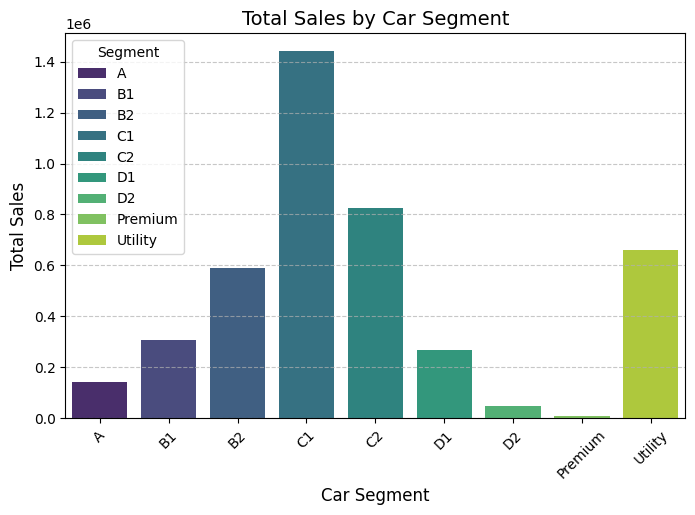

In [314]:
#Plot the bar chart

plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Total', data=df_grouped, hue='Segment', palette='viridis', legend= True)

#Customize the plot
plt.title('Total Sales by Car Segment', fontsize=14)
plt.xlabel('Car Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  Show the plot
plt.show()

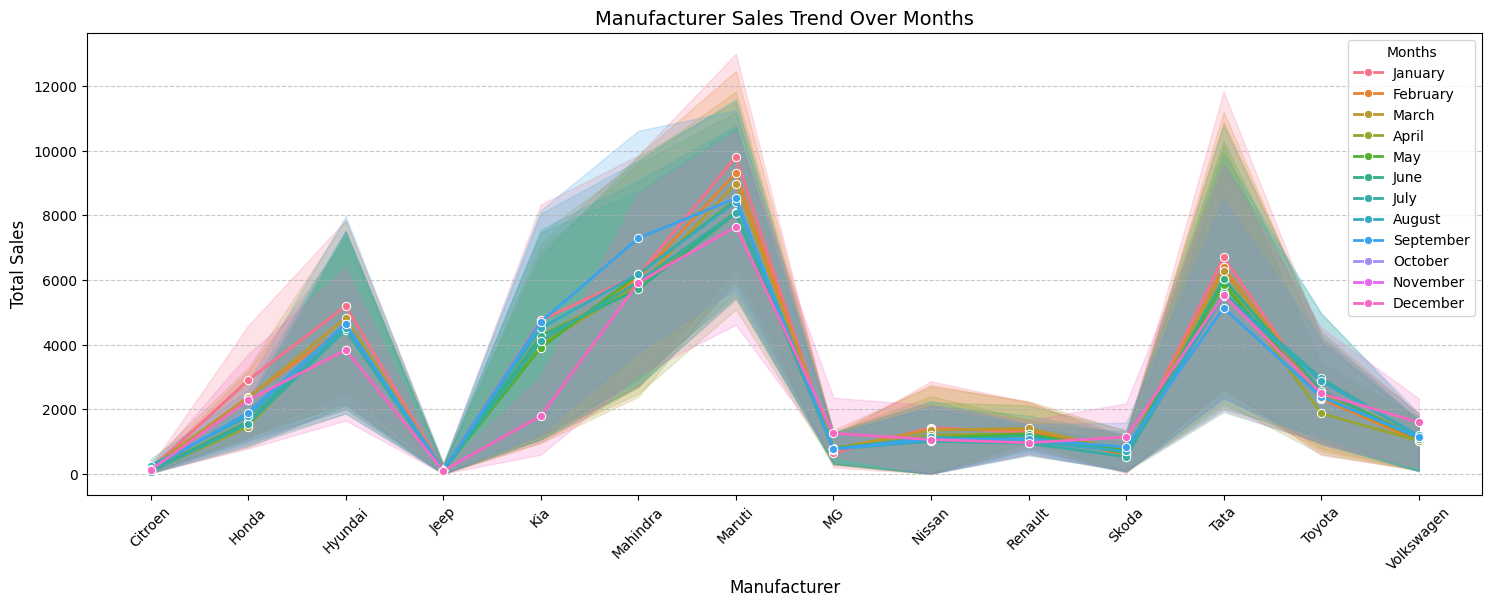

In [59]:
# Convert 'Month' to categorical for correct order
df_p['Months'] = pd.Categorical(df_p['Months'], categories=['January', 'February', 'March','April','May','June','July','August','September','October','November','December'], ordered=True)

#  Plot the sales trend
plt.figure(figsize=(18, 6))
sns.lineplot(x='Make', y='Sales', hue='Months', data=df_p, marker='o', linewidth=2)

# Customize the plot
plt.title('Manufacturer Sales Trend Over Months', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  Show the plot
plt.show()

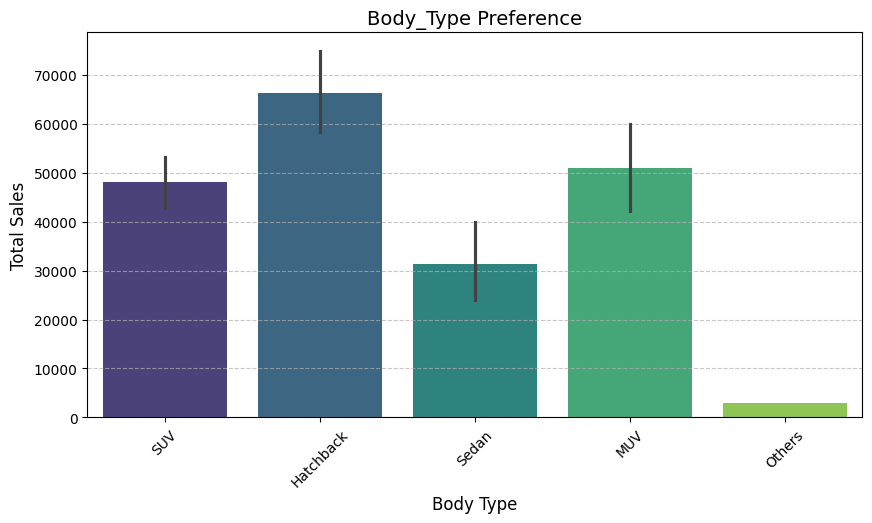

In [60]:

plt.figure(figsize=(10, 5))
sns.barplot(x='Body Type', y='Total', data=df_p,hue = 'Body Type', palette='viridis',legend = False)
#Customize the plot
plt.title('Body_Type Preference', fontsize=14)
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  Show the plot
plt.show()


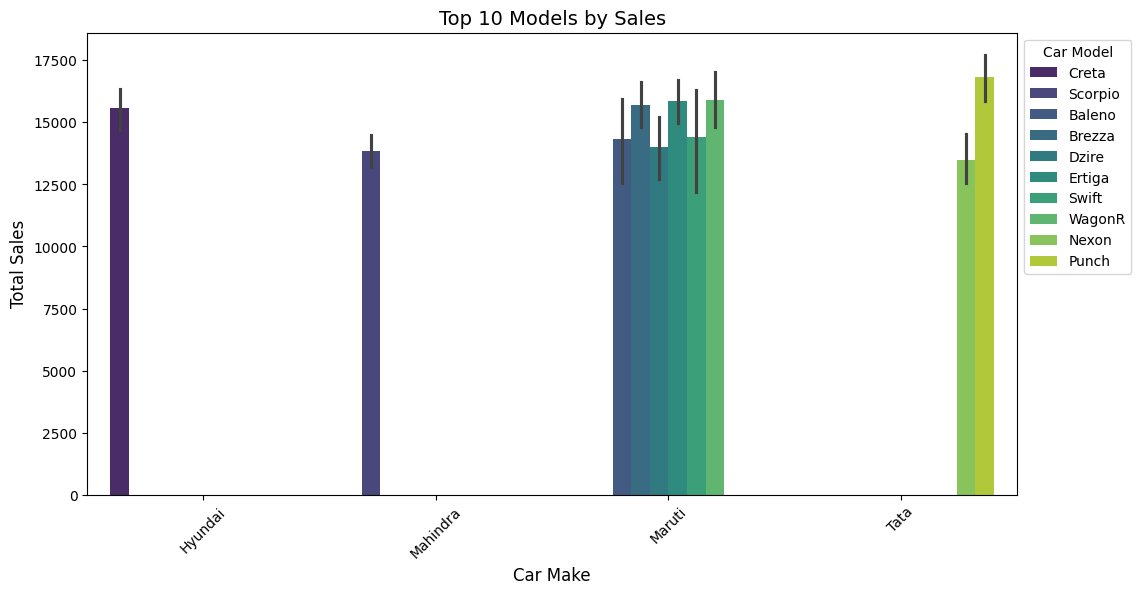

In [61]:
top_models = df_p.groupby('Model')['Sales'].sum().nlargest(10).index
df_top = df_p[df_p['Model'].isin(top_models)]

#  Grouped Bar Chart (Filtered Data)
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Sales', hue='Model', data=df_top, palette='viridis')

#  Customize
plt.title('Top 10 Models by Sales', fontsize=14)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title="Car Model", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

# Show
plt.show()

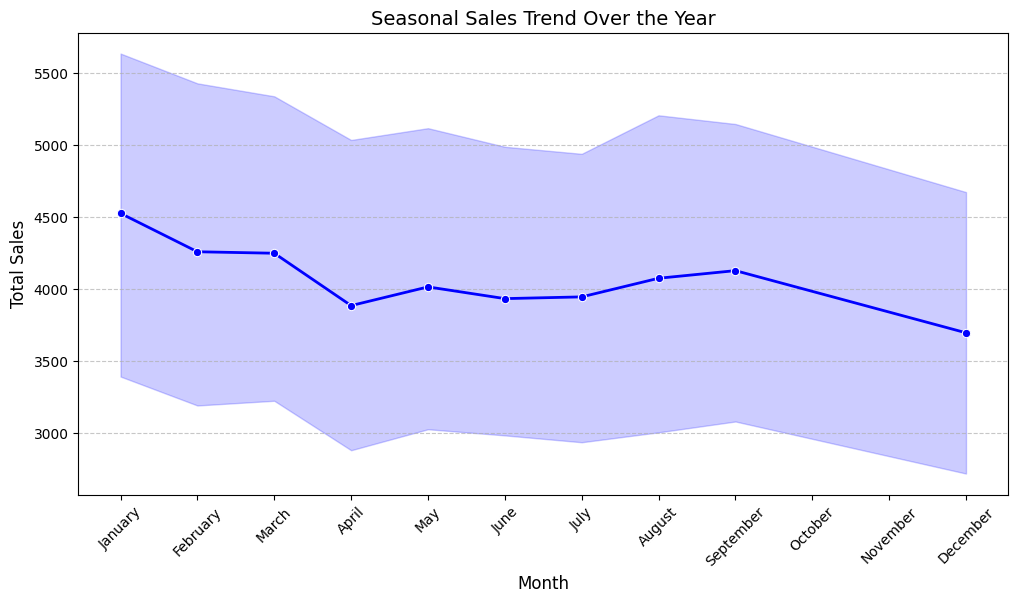

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Months', y='Sales', data=df_p, marker='o', color='b', linewidth=2)

# Customize
plt.title('Seasonal Sales Trend Over the Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show
plt.show()

In [159]:
print(df_p)


            Make   Model     Months  Sales  Total Segment Body Type  MoM %  \
0        Citroen  Basalt    January      0   1267      C2       SUV     68   
1        Citroen  Basalt   February      0   1267      C2       SUV     68   
2        Citroen  Basalt      March      0   1267      C2       SUV     68   
3        Citroen  Basalt      April      0   1267      C2       SUV     68   
4        Citroen  Basalt        May      0   1267      C2       SUV     68   
...          ...     ...        ...    ...    ...     ...       ...    ...   
1038  Volkswagen  Virtus     August   1876  21210      C2     Sedan     55   
1039  Volkswagen  Virtus  September   1697  21210      C2     Sedan     55   
1040  Volkswagen  Virtus   October    2351  21210      C2     Sedan     55   
1041  Volkswagen  Virtus  November    1457  21210      C2     Sedan     55   
1042  Volkswagen  Virtus   December   2257  21210      C2     Sedan     55   

      YoY %  
0         0  
1         0  
2         0  
3      

In [69]:
df_car1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     int64  
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       87 non-null     int64  
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     float64
 18  YoY %      87 non-null     float64
dtypes: float64(2), int64(13), object(4)
memory usage: 13

In [292]:
df_for =df_p.groupby('Months',as_index=False)['Sales'].sum()
df_for =df_for.sort_values('Months')
df_for.info()
df_for.head(12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Months  12 non-null     object
 1   Sales   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


,Months,Sales
0,April,337770
1,August,354273
2,December,321345
3,February,370279
4,January,393471
5,July,343026
6,June,338047
7,March,369381
8,May,349057
9,November,351592


In [293]:
df_for['Months'] = df_for['Months'].str[:3]  # Take only the first 3 characters (to handle "March" → "Mar")

# Convert to datetime
df_for['Months'] = pd.to_datetime(df_for['Months'] ,format='%b', errors='coerce')

df_for =df_for.sort_values('Months')
print(df_for)

       Months   Sales
4  1900-01-01  393471
3  1900-02-01  370279
7  1900-03-01  369381
0  1900-04-01  337770
8  1900-05-01  349057
6  1900-06-01  338047
5  1900-07-01  343026
1  1900-08-01  354273
11 1900-09-01  358879
10 1900-10-01  397947
9  1900-11-01  351592
2  1900-12-01  321345


In [294]:
df_for = df_for.reset_index(drop=True)

In [295]:
print(df_for['Months'].unique())

<DatetimeArray>
['1900-01-01 00:00:00', '1900-02-01 00:00:00', '1900-03-01 00:00:00',
 '1900-04-01 00:00:00', '1900-05-01 00:00:00', '1900-06-01 00:00:00',
 '1900-07-01 00:00:00', '1900-08-01 00:00:00', '1900-09-01 00:00:00',
 '1900-10-01 00:00:00', '1900-11-01 00:00:00', '1900-12-01 00:00:00']
Length: 12, dtype: datetime64[ns]


In [296]:
df_for['Months'] = df_for['Months'].dt.month

In [297]:
df_for = df_for.set_index('Months')

In [299]:
df_for.head(13)

,Sales
Months,
1,393471
2,370279
3,369381
4,337770
5,349057
6,338047
7,343026
8,354273
9,358879


<Axes: xlabel='Months'>

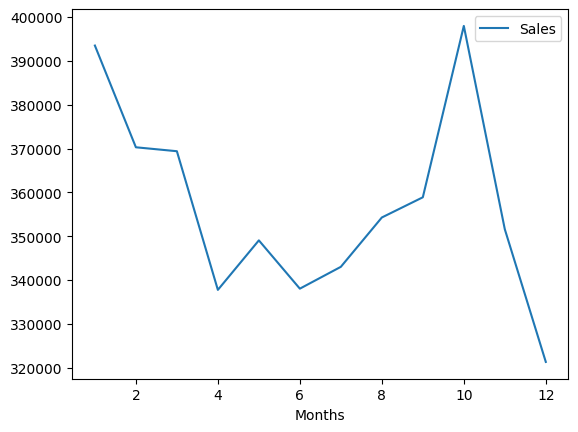

In [269]:
df_for.plot()

In [305]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [309]:
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

The Simple Moving Average (SMA) 
SMA smooths sales data by averaging a fixed number of past values.

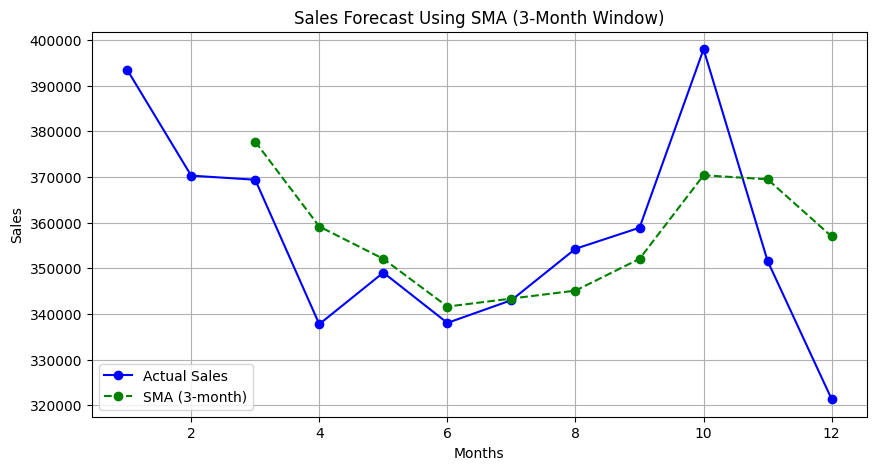

In [312]:
 # Apply Simple Moving Average (SMA) with a 3-month window
df_for["SMA_3"] = df_for["Sales"].rolling(window=3).mean()

# Plot Actual Sales & SMA
plt.figure(figsize=(10, 5))
plt.plot(df_for.index, df_for["Sales"], marker="o", linestyle="-", color="blue", label="Actual Sales")
plt.plot(df_for.index, df_for["SMA_3"], marker="o", linestyle="--", color="green", label="SMA (3-month)")

plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Sales Forecast Using SMA (3-Month Window)")
plt.legend()
plt.grid(True)
plt.show()

Exponential Smoothing (SES) for Forecasting Sales for next 3 months

C:\Users\nisha\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\nisha\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nisha\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


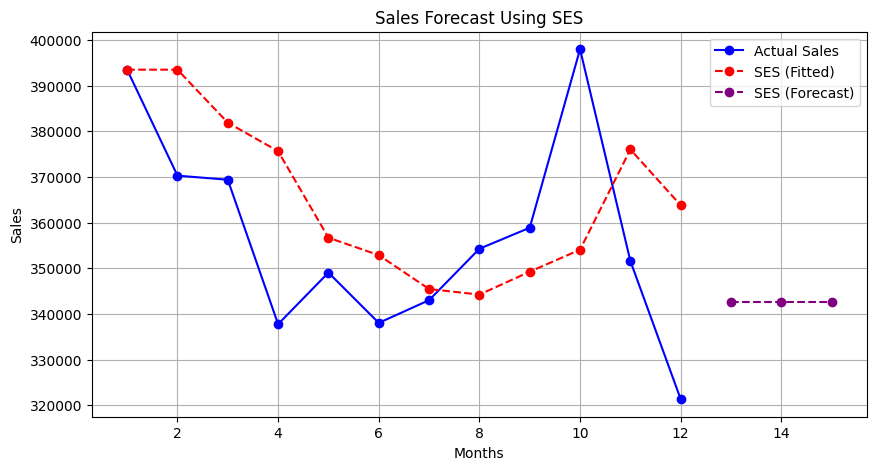

In [310]:
# Apply Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(df_for["Sales"]).fit(smoothing_level=0.5, optimized=False)

# Add SES fitted values
df_for["SES"] = ses_model.fittedvalues

# Forecast Next 3 Months
future_forecast = ses_model.forecast(steps=3)

# Plot Actual vs. SES Forecast
plt.figure(figsize=(10, 5))
plt.plot(df_for.index, df_for["Sales"], marker="o", linestyle="-", color="blue", label="Actual Sales")
plt.plot(df_for.index, df_for["SES"], marker="o", linestyle="--", color="red", label="SES (Fitted)")
plt.plot(range(13, 16), future_forecast, marker="o", linestyle="--", color="purple", label="SES (Forecast)")

plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Sales Forecast Using SES")
plt.legend()
plt.grid(True)
plt.show()

Future Sales Forecast (SES)
Predicted Sales for the Next 3 Months:

Month 13 → 342,000
Month 14 → 342,000
Month 15 → 342,000
Since we used Simple Exponential Smoothing (SES) with a fixed smoothing factor, the forecast remains stable

Recommendations for Car Sales in the Automobile Industry (India, 2024)
Based on the 2024 car sales trends in India, where the average monthly sales count is 49,251. from the given dataset we observe key insights regarding seasonality, segment preferences, and future sales predictions.

Key Insights from 2024 Car Sales Data:
Peak Sales: October recorded the highest sales.

Decline in Sales: Sales dropped in April and year-end months.

Preferred Segment: C1 segment cars were the most purchased.

. Top Manufacturer: Maruti led the market.

Most Popular Models:

1️ Tata Punch

2️ Hyundai Creta

3️ Maruti WagonR

Seasonal Increase: Sales grew between June and October.

Sales Forecast (Next 3 Months - SES Model):

Predicted sales range (34,000 - 34,300)

Recommendations for Automobile Industry
1. Enhance Inventory Planning for Peak Sales Months
Stock more units of high-demand models (Punch, Creta, WagonR) from June to October. Increase production and dealership stock before the festive season (October) to capitalize on demand.

2.Revamp Strategies for Slow Months (April & Year-End)
Introduce discounts, exchange offers, and financing options during slow periods. Promote off-season sales campaigns (April & December) with special incentives.

3. Leverage the Popularity of the C1 Segment
Focus marketing efforts on C1 segment cars, highlighting fuel efficiency and affordability. Bundle extended warranty, insurance discounts, and free maintenance to boost sales.

4.Strengthen Maruti’s Market Dominance & Competitor Strategies
Maruti should maintain strong marketing campaigns while other brands can target alternative USPs (EVs, safety features, etc.). Promote competing models like Hyundai Venue or Tata Nexon to challenge Maruti’s stronghold.

5.Forecast-Driven Pricing and Promotional Strategies
With sales predicted between 34,000 - 34,300 for the next 3 months, strategic promotions can prevent further decline. Offer festive season pre-booking discounts to boost early demand.

Recommendations for the Marketing Team
1.Targeted Ad Campaigns Based on Sales Trends:

Festive Offers (September–October): Maximize marketing for Diwali, Navratri, and Onam. Winter Campaigns (November–December): Promote year-end clearance sales. New Year Offers (January): Push exclusive exchange bonuses.

2.Digital Marketing & Regional Strategies:

Increase social media engagement and influencer partnerships for the C1 segment. Use regional language ads targeting Tier 2 & 3 cities, where affordability matters.

3.Personalized Financing & Exchange Programs:

Highlight affordable EMI options for first-time buyers. Offer exchange bonuses on older models to boost sales during low months.

4.EV & Hybrid Promotions:

With increasing interest in electric cars, brands should promote hybrid & EV models alongside C1 cars.

5.Dealer Network Expansion & Test Drive Initiatives:

Offer exclusive showroom discounts during slow months to push sales. Increase test drive availability in emerging Tier-2 & Tier-3 markets.

add Codeadd Markdown
                            ***Thank You***